<div style="border:solid Chocolate 2px; padding: 40px">

<b>Михаил, привет!👋</b>

Меня зовут Александр Куимов, я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

<div class="alert alert-info" role="alert">
<h2> Комментарий студента  <a class="tocSkip"></h2>
    
Привет, Александр!
    
Приятно познакомиться!

    
Я в поездке, т.ч. только сейчас добрался до проекта.
Спасибо большое за замечания и предложения. Ниже я оставлю комментарии на все исправления и изменения.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

И вновь, привет! Пожалуйста)

# Определение возраста покупателей

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:

- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя. 

Основные задачи:
- Построить модель, которая по фотографии определит приблизительный возраст человека. В нашем распоряжении набор фотографий людей с указанием возраста
- Добиться значения MAE на тестовой выборке не больше 8.

*Постройте и обучите свёрточную нейронную сеть на датасете с фотографиями людей. Добейтесь значения MAE на тестовой выборке не больше 8.
Функцию загрузки тестовой выборки load_test(path) напишите самостоятельно. Вместе со старыми функциями в коде должны быть:
load_train(path),
load_test(path),
create_model(input_shape),
train_model(model, train_data, test_data, batch_size, epochs, steps_per_epoch, validation_steps).*

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Вижу твое добавленное описание проекта. Молодец! Это поможет тебе расставлять акценты в выводах.

## Исследовательский анализ данных

### Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import random
import seaborn as sns

from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import accuracy_score
from PIL import Image
from IPython.display import display

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
 Молодец, что собираешь импорты в одну ячейку и помещаешь ее в начале проекта!

### Загрузка данных

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
datagen = ImageDataGenerator(rescale=1./255)
datagen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


### Знакомство с данными

In [3]:
def info(df,gen):
    
    '''
        Description: Функция первичного знакомства с данными.
    '''
    
    print('10 случайных строк:')
    display(df.sample(10))
    print('')
    print('Размер выборки:')
    display(df.shape)
    print('')
    print('Общая информация о датасете:')
    display(df.info())
    print('')
    print('Общая статистика:')
    display(df.describe())
    print('')
    print('Дубликаты:')
    display(df.duplicated().sum())
    display(df[df.duplicated()])
    print('')
    print('Плотность распределения возраста:')
    df.hist(bins=100)
    plt.show()
    print('Примеры фотографий в выборке:')
    fig = plt.figure(figsize=(10,10))
    for i in range(0,gen.batch_size//2):
        fig.add_subplot(4, 4, i+1)
        k = random.randint(0,len(gen))
        generated_image = gen[k][0][i]
        image_age = gen[k][1][i]
        plt.imshow(generated_image)
        plt.title(f'Age {image_age}')
        plt.colorbar()
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()

10 случайных строк:


,file_name,real_age
3971,003971.jpg,32
520,000520.jpg,16
4593,004593.jpg,16
6705,006712.jpg,40
710,000710.jpg,32
3985,003985.jpg,39
4638,004638.jpg,33
5913,005914.jpg,17
1515,001515.jpg,30
4855,004855.jpg,20



Размер выборки:


(7591, 2)


Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


None


Общая статистика:


,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000



Дубликаты:


0

,file_name,real_age



Плотность распределения возраста:


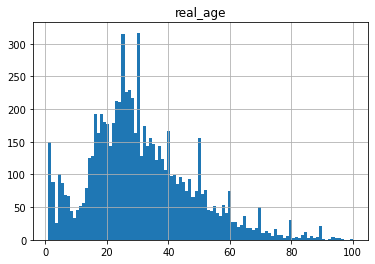

Примеры фотографий в выборке:


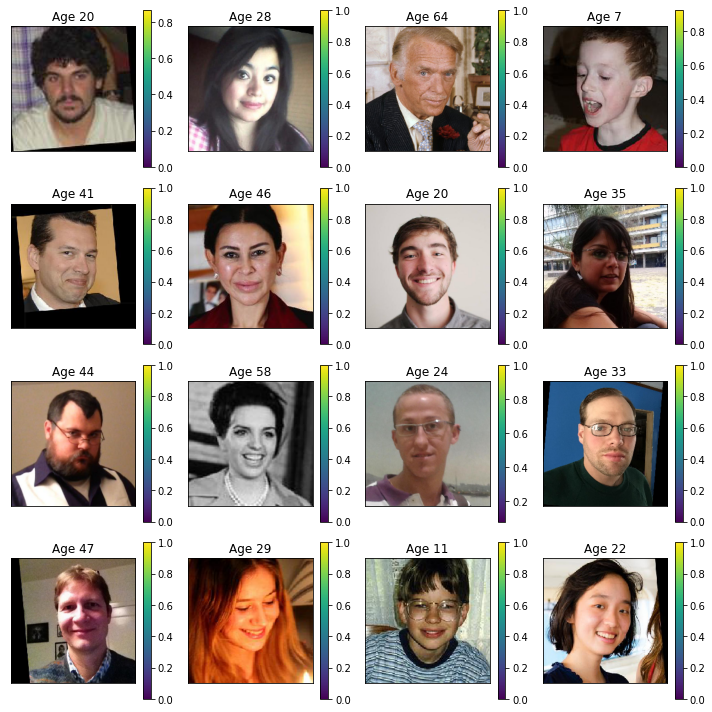

In [4]:
info(labels,datagen_flow)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Размер выборки выведен. Можно тут еще добавить несколько слов, большая ли она, и как это скажется при обучении модели.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Гистограмма целевого признака выведена верно. Можно тут еще добавить, похоже ли распределение на простые, имеются ли "кластеры" и выбросы.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Примеры фотографий выведены!
    
Можно еще поработать над оформлением графика с фото (название осей и самого графика, а также размер).

### Выводы:

***
- *Данные загружены, всего имеется 7591 фотография*
- *Данные не содержат пропусков*
- *Средний возраст людей в предствавленных данных: 31.2 года, стандартное отклонение: 17.15 лет*
- *Медианный возраст: 29 лет*
- *Минимальный возраст: 1 год, максимальный возраст: 100 лет*
***

***
- Среди фотографий встречаются заранее повёрнутые и обрезанные изображения
- Среди фотографий встречаются чёрно-белые изображения
- Среди фотографий встречаются изображения низкого и среднего качества
***

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Тут следует еще указать в выводе, какова общая ориентация фотографий (нужно ли их поворачивать), есть ли черно-белые фотографии, различается ли размер изображений?
Добавь, пожалуйста.
 </div>

<div class="alert alert-info" role="alert">
<h2> Комментарий студента  <a class="tocSkip"></h2>
    
Выводы добавил.

Не придумал, как можно проверить параметрически то, о чём ты просишь поэтому написал выводы по имеющимся образцам на свой взгляд. 🤷‍♂️

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Так и следовало поступить) 
    
Общая ориентация фотографий примерно одинакова - в некоторых фото их уже повернули за нас, чтобы выровнять положение лица, значит нам их не обязательно поворачивать, а начальный размер изображений отличается, в силу того, что визуально заметно различное качество фото, где-то есть черные рамки (они не несут полезной информации). В итоге, размер изображений мы приведем к единому перед обучением модели.

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
 
# def load_train(path):
#     datagen = ImageDataGenerator(
#         horizontal_flip=True,
#         vertical_flip=True,
#         rescale=1/255.)

#     train_datagen_flow = datagen.flow_from_directory(
#         path,
#         target_size=(150, 150),
#         batch_size=16,
#         class_mode='sparse',
#         seed=12345)

#     return train_datagen_flow

def load_train(path):
    data = pd.read_csv(path + 'labels.csv')

    train_datagen = ImageDataGenerator(
        validation_split=0.2,
        rescale=1./255,
        horizontal_flip=True,)
#       vertical_flip=True,)
    

    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe = data,
        directory= path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)
    return train_datagen_flow


def load_test(path):
    data = pd.read_csv(path + 'labels.csv')

    test_datagen = ImageDataGenerator(
        validation_split=0.2,
        rescale=1./255,
        horizontal_flip=True,) 

    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe = data,
        directory= path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)
    return test_datagen_flow

 
def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape,
                        #classes=1000,
                        include_top=False,
                        weights='imagenet'
                       )
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(12, activation='relu'))
    optimizer = Adam(lr=0.0002)
    model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mae'])
    return model
 

def train_model(model, train_data, test_data, batch_size=None, epochs=15,
                steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

```

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>

- Тут следует еще отобразить функцию загрузчика для тестовой выборки. Добавь, пожалуйста.
- В настройках загрузчиков следует указать `subset='training'` - в загрузчике обучающей выборки и `subset='validation'` - в загрузчике тестовой выборки.
- В  `ImageDataGenerator` обоих загрузчиков следует указать `validation_split` так, чтобы валидационная выборка имела размер не меньше 20% от полной.
    
Полезные ссылки: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator 
    
https://practicum.yandex.ru/learn/data-scientist/courses/da9dd6d4-e2bf-46aa-a430-b21c39f323b4/sprints/20345/topics/b3307f77-ea84-44ac-b8f5-444e12fbd536/lessons/e805d993-a71e-4c24-ac36-0271374b5f78/    

<div class="alert alert-info" role="alert">
<h2> Комментарий студента  <a class="tocSkip"></h2>
    
Обновлённые `def load_train` и новую `def load_test` добавил

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>  Теперь все четко)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

- Параметру  `target_size` стоит задать значение `(224, 224)`, ведь на таком размере фото обучалась сеть в Imagenet.
- Т.к. для нас важна общая ориентация лица на фото, то вертикальный флип и поворот более, чем на 20 градусов, желательно не применять, он искажает ориентацию лица на фото.  
- А вот горизонтальный флип на тренировочной части уместен. По сути это позволяет увеличить выборку в 2 раза. Причем изображения полученные таким образом неотличимы от настоящих.        

<div class="alert alert-info" role="alert">
<h2> Комментарий студента  <a class="tocSkip"></h2>
    
- target_size исправил на (224,224)
- вертикальный flip закомментировал
- горизонтальный flip оставил.    

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Супер!

```
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Train for 178 steps, validate for 60 steps
Epoch 1/15
2022-07-21 08:38:25.041560: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-07-21 08:38:28.043900: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 158s - loss: 236.4592 - mae: 11.1303 - val_loss: 595.5871 - val_mae: 19.3904
Epoch 2/15
178/178 - 89s - loss: 92.6703 - mae: 7.2277 - val_loss: 722.8016 - val_mae: 21.9107
Epoch 3/15
178/178 - 89s - loss: 68.8762 - mae: 6.2775 - val_loss: 298.3092 - val_mae: 12.9265
Epoch 4/15
178/178 - 89s - loss: 57.1186 - mae: 5.7820 - val_loss: 132.9691 - val_mae: 8.8124
Epoch 5/15
178/178 - 89s - loss: 48.0338 - mae: 5.3353 - val_loss: 87.0461 - val_mae: 6.8346
Epoch 6/15
178/178 - 89s - loss: 41.4338 - mae: 4.9560 - val_loss: 73.4758 - val_mae: 6.2678
Epoch 7/15
178/178 - 89s - loss: 35.8353 - mae: 4.5782 - val_loss: 68.6192 - val_mae: 6.1127
Epoch 8/15
178/178 - 89s - loss: 32.0619 - mae: 4.3735 - val_loss: 89.2643 - val_mae: 7.2203
Epoch 9/15
178/178 - 89s - loss: 28.9610 - mae: 4.1563 - val_loss: 65.9167 - val_mae: 6.0166
Epoch 10/15
178/178 - 89s - loss: 26.2554 - mae: 3.9268 - val_loss: 66.4694 - val_mae: 6.1470
Epoch 11/15
178/178 - 89s - loss: 22.8827 - mae: 3.6888 - val_loss: 77.8586 - val_mae: 6.7697
Epoch 12/15
178/178 - 89s - loss: 20.6356 - mae: 3.4994 - val_loss: 70.5316 - val_mae: 6.3521
Epoch 13/15
178/178 - 89s - loss: 19.2414 - mae: 3.3738 - val_loss: 66.9636 - val_mae: 6.0657
Epoch 14/15
178/178 - 89s - loss: 16.9266 - mae: 3.1803 - val_loss: 65.0013 - val_mae: 5.7957
Epoch 15/15
178/178 - 89s - loss: 15.5948 - mae: 3.0519 - val_loss: 65.8877 - val_mae: 5.8612
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 10s - loss: 65.8877 - mae: 5.8612
Test MAE: 5.8612
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
```

```
Found 6073 validated image filenames.
Found 1518 validated image filenames.

380/380 - 102s - loss: 11.1062 - mae: 11.1133 - val_loss: 24.2719 - val_mae: 24.2684
Epoch 2/15
380/380 - 39s - loss: 8.1042 - mae: 8.1047 - val_loss: 11.1969 - val_mae: 11.1899
Epoch 3/15
380/380 - 39s - loss: 7.4259 - mae: 7.4274 - val_loss: 8.1929 - val_mae: 8.1935
Epoch 4/15
380/380 - 39s - loss: 6.6817 - mae: 6.6835 - val_loss: 7.9872 - val_mae: 7.9860
Epoch 5/15
380/380 - 39s - loss: 6.3308 - mae: 6.3325 - val_loss: 8.4466 - val_mae: 8.4466
Epoch 6/15
380/380 - 39s - loss: 5.6981 - mae: 5.7001 - val_loss: 7.3181 - val_mae: 7.3198
Epoch 7/15
380/380 - 39s - loss: 5.3772 - mae: 5.3771 - val_loss: 7.9379 - val_mae: 7.9392
Epoch 8/15
380/380 - 39s - loss: 5.0881 - mae: 5.0902 - val_loss: 7.0523 - val_mae: 7.0551
Epoch 9/15
380/380 - 39s - loss: 4.8327 - mae: 4.8350 - val_loss: 6.7823 - val_mae: 6.7820
Epoch 10/15
380/380 - 39s - loss: 4.4875 - mae: 4.4884 - val_loss: 6.7788 - val_mae: 6.7788
Epoch 11/15
380/380 - 39s - loss: 4.2985 - mae: 4.3019 - val_loss: 6.8939 - val_mae: 6.8945
Epoch 12/15
380/380 - 39s - loss: 4.0740 - mae: 4.0748 - val_loss: 6.4278 - val_mae: 6.4279
Epoch 13/15
380/380 - 39s - loss: 3.8591 - mae: 3.8606 - val_loss: 6.6027 - val_mae: 6.6028
Epoch 14/15
380/380 - 39s - loss: 3.7022 - mae: 3.7038 - val_loss: 6.2870 - val_mae: 6.2879
Epoch 15/15
380/380 - 39s - loss: 3.5428 - mae: 3.5434 - val_loss: 6.2002 - val_mae: 6.2012
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
95/95 - 8s - loss: 6.1667 - mae: 6.1680
Test MAE: 6.1680
```

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>

Обнови, пожалуйста, ячейку с выводом метрик после правки кода модели.

<div class="alert alert-info" role="alert">
<h2> Комментарий студента  <a class="tocSkip"></h2>
    
Код поправил, новую ячейку с выводом метрик добавил

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отличный результат по метрике)

## Анализ обученной модели

***Согласно поставленным задачам:*** <br> 
<br>
    *Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:*<br>
    *- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;* <br>
    *- Контролировать добросовестность кассиров при продаже алкоголя.* <br>
    *- Построить модель, которая по фотографии определит приблизительный возраст человека. В нашем распоряжении набор фотографий людей с указанием возраста* <br>
    *- Добиться значения MAE на тестовой выборке не больше 8.* <br>
    

***Была постороена и обучена модель для определения возраста клиентов на базе архитектуры RES-NET50.*** <br>
***Модель преодолела целевую метрику MAE(ниже 8) и достигла показателя  ̶5̶.̶8̶6̶1̶2̶<br>  6.1680***<br> 

**̶Д̶а̶н̶н̶а̶я̶ ̶м̶о̶д̶е̶л̶ь̶ ̶п̶о̶д̶х̶о̶д̶и̶т̶ ̶д̶л̶я̶ ̶з̶а̶д̶а̶ч̶ ̶о̶п̶р̶е̶д̶е̶л̶е̶н̶и̶я̶ ̶в̶о̶з̶р̶а̶с̶т̶а̶ ̶к̶л̶и̶е̶н̶т̶о̶в̶ ̶и̶ ̶к̶о̶н̶т̶р̶о̶л̶я̶ ̶д̶о̶б̶р̶о̶с̶о̶в̶е̶с̶т̶н̶о̶с̶т̶и̶ ̶к̶а̶с̶с̶и̶р̶о̶в̶ ̶п̶р̶и̶ ̶п̶р̶о̶д̶а̶ж̶е̶ ̶а̶л̶к̶о̶г̶о̶л̶я̶ ***<br> 

***С помощью данной модели можно анализировать покупки для разных возрастных групп покупателей для чего потребуется в дальнейшем связать данные покупателей с базой данных их покупок*** <br>

**Таким образом, можно считать, что поставленные задачи были решены.**

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Не думаю, что модель с такой погрешностью  сможет помочь в определении возраста покупателя для продажи алкоголя.

      

<div class="alert alert-info" role="alert">
<h2> Комментарий студента  <a class="tocSkip"></h2>
    
MAE (Mean Ablosute Error) - абсолютная ошибка в годах = 6.1680, что подразумевает ошибку модели в предсказании возраста на ~6 лет. Такая ошибка действительно не позволит определить есть ли покупателю 18 лет с достаточной точностью и имеет ли он, соответственно, право на покупку алкоголя.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Молодец)

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Могу поделиться такими ссылками для углубленного изучения темы спринта:
    
- Видеокурс от Stanford University: https://www.youtube.com/watch?v=vT1JzLTH4G4&list=PLC1qU-LWwrF64f4QKQT-Vg5Wr4qEE1Zxk
    
- Курс от Физтех-школы Прикладной Математики и Информатики МФТИ: https://vk.com/dlschool_mipt
    
- Курс Нейронные сети и компьютерное зрение от Sumsung: https://stepik.org/course/50352/promo#toc

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.1 <a class="tocSkip"> </h2>    
    
  
Михаил,    
у меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с проектом. Молодец! Загружены данные для анализа, изучен каждый параметр, модель построена и протестирована. Тебе удалось успешно справиться с первой задачей в области компьютерного зрения. Поздравляю!
    
Отмечу отдельные положительные моменты проекта🙂:
    
- радует, что проект хорошо структурирован, приятно проверять такие работы;
- есть красивые визуализации в проекте.
    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть. 
Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства:

- Указать в выводе, какова общая ориентация фотографий (нужно ли их поворачивать), есть ли черно-белые фотографии, различается ли размер изображений.
- Тут следует еще отобразить функцию загрузчика для тестовой выборки. Добавь, пожалуйста.
- В настройках загрузчиков следует указать `subset='training'` - в загрузчике обучающей выборки и `subset='validation'` - в загрузчике тестовой выборки.
- В  `ImageDataGenerator` обоих загрузчиков следует указать `validation_split` так, чтобы валидационная выборка имела размер не меньше 20% от полной.
- Обнови, пожалуйста, ячейку с выводом метрик после правки кода модели.    
- Исправить выводы при необходимости.
    
Если будут вопросы, обращайся, с удовольствием на них отвечу.  
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.2 <a class="tocSkip"> </h2>    
    
     
  
Михаил, теперь почти идеально, молодец! Принимаю твой проект)
    
    
В этом проекте все шаги отработаны. С интересом читал твои размышления, код и выводы. Что ещё для дальнейшего улучшения качества возможно сделать?
    
Опишу здесь некоторые идеи:
    
1. Качество данных на входе: оценить еще раз возраст по фото, возможно в выборке есть выбросы.
2. Анализ ошибок: к примеру модель сильно ошибается на сегменте пожилых людей, зато почти идеально работает с детьми. Тогда мы поймем, каких возрастов фото было бы хорошо добавить в выборку для дообучения.
3. Дополнительно изучить распределение целевого признака, возможно что выборка была составлена неслучайным образом (видна небольшая бимодальность), посмотреть, каких возрастных групп представлено мало, чтобы их потом добавить в выборку.
    
Но цель нашего проекта достигнута. Рад был тебе помочь)
    
Преподаватель в Slack будет рад помочь, если у тебя появятся вопросы. Удачи тебе в финальном проекте!
  
</div>